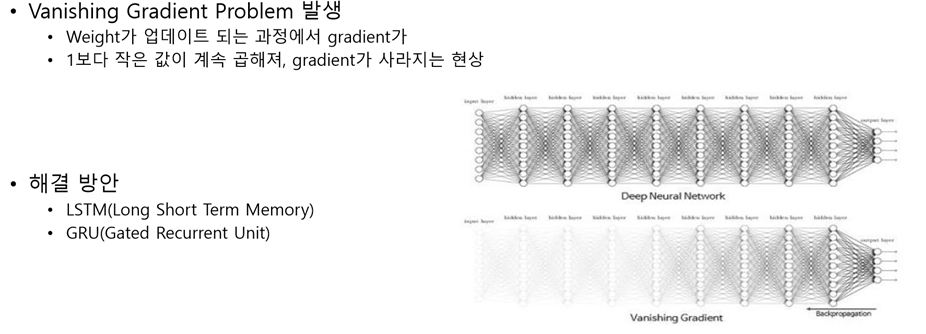

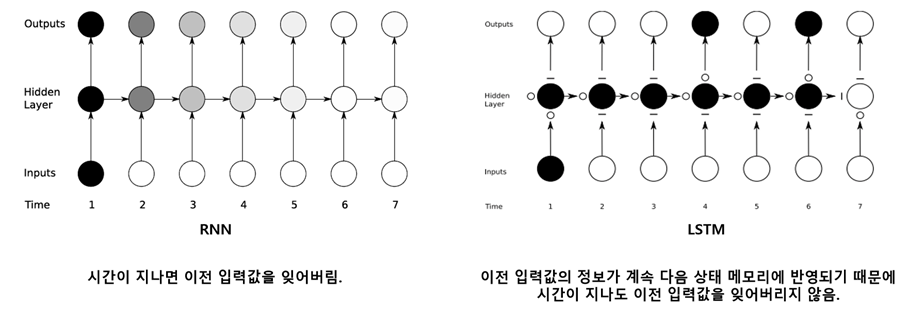

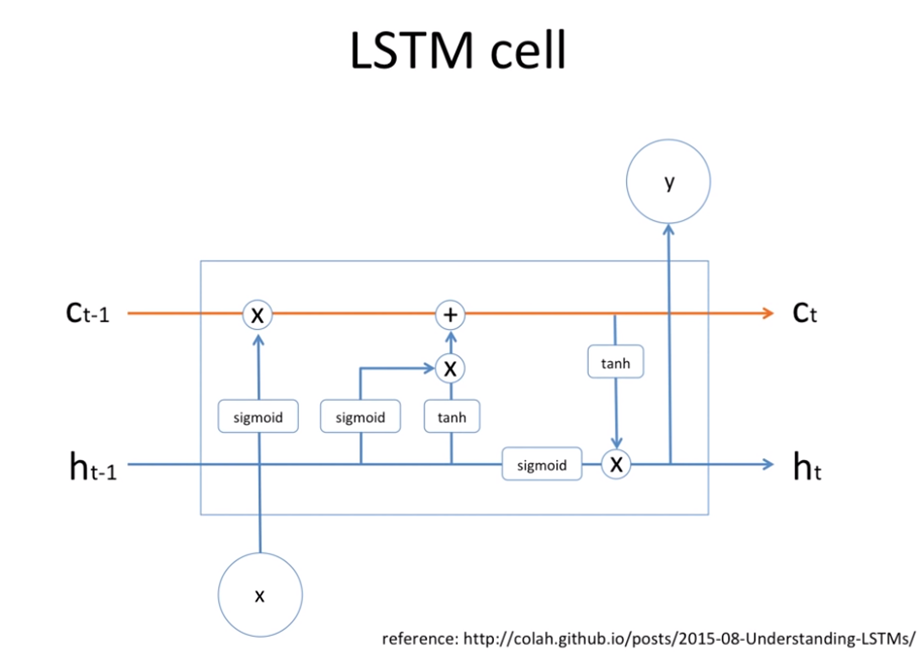

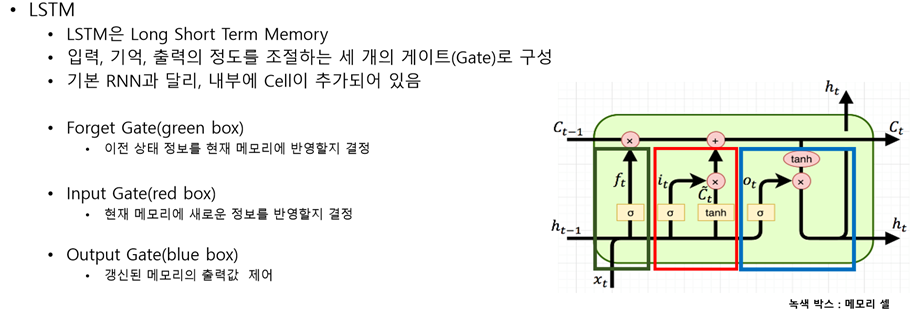

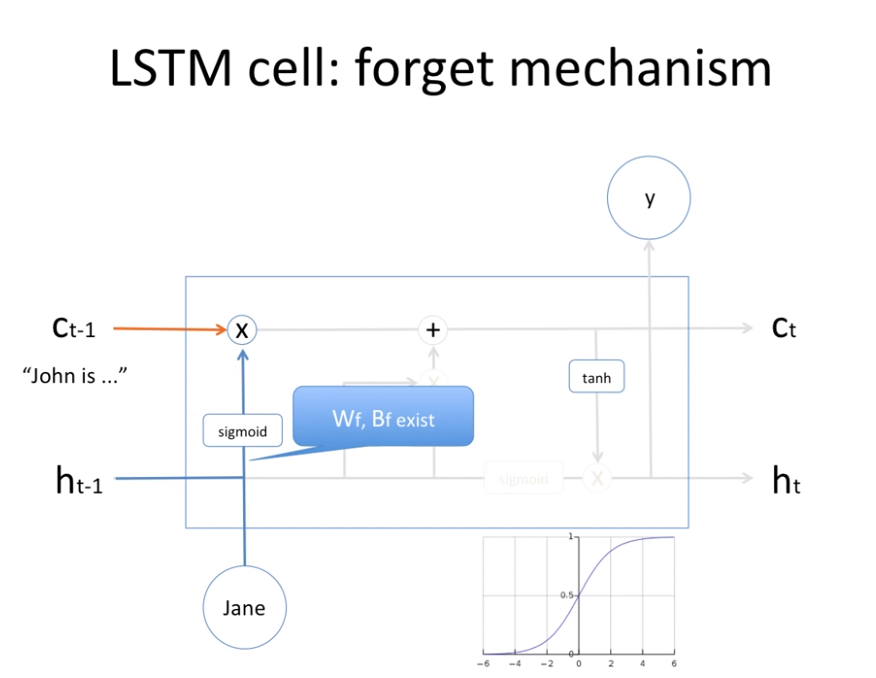

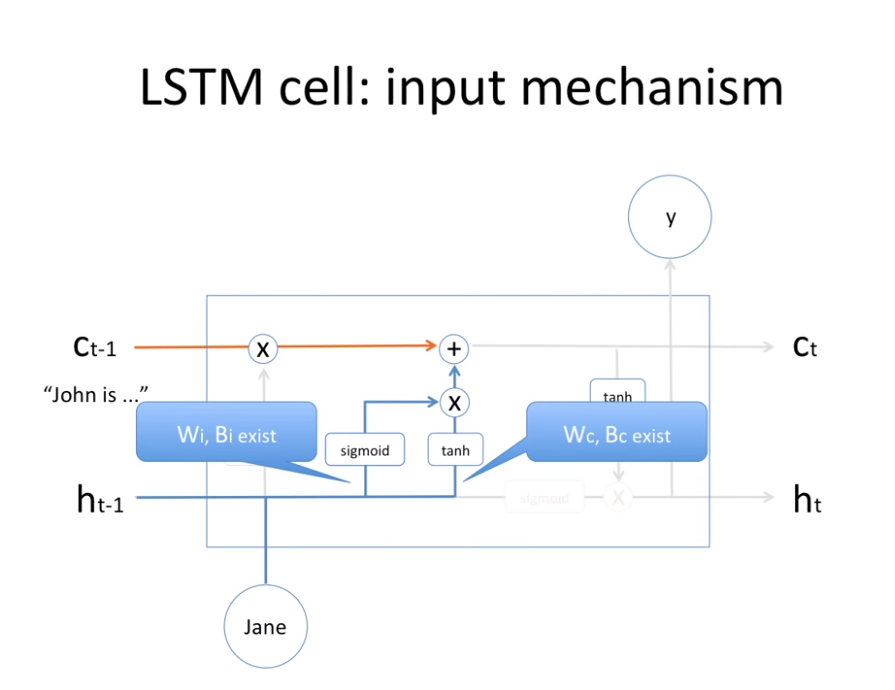

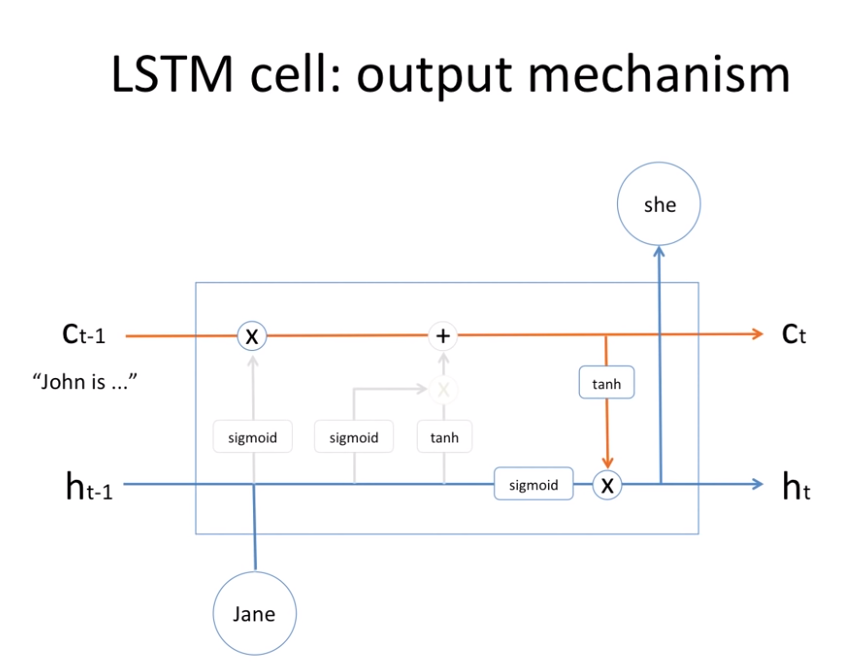

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
from tensorflow.python.keras.preprocessing.text import Tokenizer
%matplotlib inline

print(tf.__version__)
print(keras.__version__)
tf.enable_eager_execution()

1.13.1
2.2.4-tf


In [2]:
char_arr = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

num_dic = {n:i for i, n in enumerate(char_arr)}  # one-hot encoding 사용 및 디코딩 위해 연관 배열 만듦.
num_dic

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [3]:
dic_len = len(num_dic)
dic_len

26

In [4]:
# 다음 배열은 입력값과 출력값으로, wor -> X, d -> Y, woo -> X, d -> Y 처럼 사용할 것이다.
seq_data = ['word', 'wood', 'deep', 'life', 'cold', 'pear', 'load', 'name', 'good', 'kind']

In [5]:
a = [1, 2, 3, 4, 5]
a[:-1]

[1, 2, 3, 4]

In [32]:
X_train_tokens = []
y_train_tokens = []

for seq in seq_data:
    input = [num_dic[n] for n in seq[:-1]]
    X_train_tokens.append(input)
    
    target = num_dic[seq[-1]]
    y_train_tokens.append(target)

In [47]:
X_train_tokens

[[22, 14, 17],
 [22, 14, 14],
 [3, 4, 4],
 [11, 8, 5],
 [2, 14, 11],
 [15, 4, 0],
 [11, 14, 0],
 [13, 0, 12],
 [6, 14, 14],
 [10, 8, 13]]

In [48]:
y_train_tokens

[3, 3, 15, 4, 3, 17, 3, 4, 3, 3]

In [49]:
one_hot = np.eye(26)
one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

In [50]:
n_hidden = 128

input_dim = output_dim = dic_len  # alphabet one-hot encoding. 26.
max_sequence = 3

In [51]:
# 신경망 모델 구성 (keras)
model = Sequential()

In [52]:
model.add(layers.Embedding(input_dim=input_dim,
                           output_dim=output_dim,
                           input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3, 26)             676       
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [53]:
matrix1 = model(np.array(X_train_tokens))
matrix1

<tf.Tensor: id=1981617, shape=(10, 3, 26), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [54]:
model.add(tf.keras.layers.LSTM(units=128))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3, 26)             676       
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               79360     
Total params: 80,036
Trainable params: 80,036
Non-trainable params: 0
_________________________________________________________________


In [55]:
matrix2 = model(np.array(X_train_tokens, dtype=np.float32))
matrix2

<tf.Tensor: id=1982511, shape=(10, 128), dtype=float32, numpy=
array([[-2.04601372e-03,  5.73567720e-03, -7.69279781e-04, ...,
        -1.62421167e-02, -2.74948757e-02,  7.75410619e-04],
       [-3.89536472e-05, -1.66261327e-02, -1.80120487e-02, ...,
        -4.10311781e-02, -5.55330305e-04, -2.19097007e-02],
       [ 8.99536442e-03,  3.66610736e-02,  3.91602516e-02, ...,
         2.52524521e-02,  2.63975724e-03, -3.32600921e-02],
       ...,
       [-3.25551666e-02, -2.50494806e-03, -1.42207704e-02, ...,
        -1.71819311e-02,  1.37753645e-02, -2.19936948e-02],
       [-3.00776656e-03,  4.69865417e-03, -2.34420858e-02, ...,
        -3.66229340e-02,  1.09155597e-02, -2.02487856e-02],
       [-4.09827046e-02, -2.12065019e-02, -1.11278547e-02, ...,
         2.99712978e-02,  1.30237360e-02, -1.45518025e-02]], dtype=float32)>

In [56]:
model.add(layers.Dense(units=26, activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3, 26)             676       
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               79360     
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3354      
Total params: 83,390
Trainable params: 83,390
Non-trainable params: 0
_________________________________________________________________


In [57]:
learning_rate = 0.001
opt = tf.train.AdamOptimizer(learning_rate = learning_rate)

X_train_pad = np.array(X_train_tokens)
X_train_pad

array([[22, 14, 17],
       [22, 14, 14],
       [ 3,  4,  4],
       [11,  8,  5],
       [ 2, 14, 11],
       [15,  4,  0],
       [11, 14,  0],
       [13,  0, 12],
       [ 6, 14, 14],
       [10,  8, 13]])

In [58]:
y_train_pad = np.array(y_train_tokens)
y_train_pad

array([ 3,  3, 15,  4,  3, 17,  3,  4,  3,  3])

In [59]:
for step in range(1000):
    with tf.GradientTape() as tape:
        hypothesis = model(X_train_pad)
        cost = tf.losses.sparse_softmax_cross_entropy(labels=y_train_pad, logits=hypothesis)
        
        yhat = np.argmax(hypothesis, axis=1)

        
        accuracy = np.mean(yhat == y_train_pad)
        
        grads = tape.gradient(target=cost, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        
    if step % 10 == 0:
        print('yhat:', yhat)
        print('y_train_pad:', y_train_pad)
        print('step: {:3}, cost: {:.3f}, accuracy: {:.3f}'.format(step, cost, accuracy))

yhat: [14  0 11  2  0 10  0 10 14 10]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:   0, cost: 3.258, accuracy: 0.000
yhat: [ 3  3 15  3  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  10, cost: 3.249, accuracy: 0.900
yhat: [ 3  3 15  3  3  3  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  20, cost: 3.228, accuracy: 0.800
yhat: [ 3  3 15  3  3  3  3  3  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  30, cost: 3.123, accuracy: 0.700
yhat: [ 3  3 15  3  3  3  3  3  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  40, cost: 2.742, accuracy: 0.700
yhat: [ 3  3 15  3  3  3  3  3  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  50, cost: 2.703, accuracy: 0.700
yhat: [ 3  3 15  3  3  3  3  3  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  60, cost: 2.700, accuracy: 0.700
yhat: [ 3  3 15  3  3  3  3  3  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step:  70, cost: 2.695, accuracy: 0.700
yhat: [ 3  3 15 

yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 670, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 680, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 690, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 700, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 710, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 720, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 730, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15  4  3 17  3  4  3  3]
y_train_pad: [ 3  3 15  4  3 17  3  4  3  3]
step: 740, cost: 2.322, accuracy: 1.000
yhat: [ 3  3 15 

In [60]:
X_test = ['com', 'gon']

X_test_tokens = []

for seq in X_test:
    input = [num_dic[n] for n in seq]
    X_test_tokens.append(input)
    
X_test_tokens

[[2, 14, 12], [6, 14, 13]]

In [61]:
X_test_pad = np.array(X_test_tokens)
X_test_pad

array([[ 2, 14, 12],
       [ 6, 14, 13]])

In [62]:
pred = model.predict(X_test_pad)
pred

array([[4.5223203e-09, 2.1900610e-09, 6.0720867e-10, 9.9999273e-01,
        6.5319427e-06, 2.8143423e-09, 1.4270094e-09, 2.9349718e-09,
        2.9038565e-09, 1.6062394e-09, 6.3370037e-10, 1.2682307e-09,
        6.3671474e-10, 3.4542125e-10, 2.0824615e-09, 4.3857162e-13,
        3.9977599e-09, 6.5925752e-07, 1.9267961e-09, 1.8856618e-09,
        1.8226124e-09, 5.3530713e-10, 5.2271831e-10, 1.1563395e-09,
        5.9736083e-09, 2.8325335e-09],
       [4.6430015e-09, 2.1737043e-09, 6.3024408e-10, 9.9999583e-01,
        3.3146507e-06, 2.5749305e-09, 1.4278114e-09, 2.8477647e-09,
        2.8635765e-09, 1.5094248e-09, 6.5604550e-10, 1.2035355e-09,
        6.4926486e-10, 3.1816455e-10, 2.1314253e-09, 5.3069967e-13,
        4.0720129e-09, 8.0535182e-07, 2.1245943e-09, 1.8576019e-09,
        1.7863259e-09, 4.9890847e-10, 5.3034127e-10, 1.1717961e-09,
        5.4384373e-09, 2.9477218e-09]], dtype=float32)

In [63]:
y_pred = np.argmax(pred, axis=1)
y_pred

array([3, 3], dtype=int64)

In [64]:
char_dic = {i:n for i, n in enumerate(char_arr)}
char_dic

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [65]:
for i in range(2):
    print('X_test:', X_test[i], 'y_pred:', y_pred[i], 'y_pred to char:', char_dic[y_pred[i]])

X_test: com y_pred: 3 y_pred to char: d
X_test: gon y_pred: 3 y_pred to char: d


In [68]:
seq_data

['word',
 'wood',
 'deep',
 'life',
 'cold',
 'pear',
 'load',
 'name',
 'good',
 'kind']

In [79]:
X_test = ['bea', 'lam']

X_test_tokens = []

for seq in X_test:
    input = [num_dic[n] for n in seq]
    X_test_tokens.append(input)

X_test_pad = np.array(X_test_tokens)
pred = model.predict(X_test_pad)
y_pred = np.argmax(pred, axis=1)
char_dic = {i:n for i, n in enumerate(char_arr)}

for i in range(2):
    print('X_test:', X_test[i], 'y_pred:', y_pred[i], 'y_pred to char:', char_dic[y_pred[i]])

X_test: bea y_pred: 17 y_pred to char: r
X_test: lam y_pred: 4 y_pred to char: e
